In [1]:
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
test = pd.read_csv('../data/titanic_test.csv')
train = pd.read_csv('../data/titanic_train.csv')

## 1. EDA

<br>



In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 1.1 시각화 통한 EDA

<br>

- 시각화 함수 활용하기

In [9]:
## 시각화 함수 생성
df = None
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()    
    df = pd.DataFrame([survived,dead])
    df.index = ['Survivied','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    return df

,female,male
Survivied,233,109
Dead,81,468


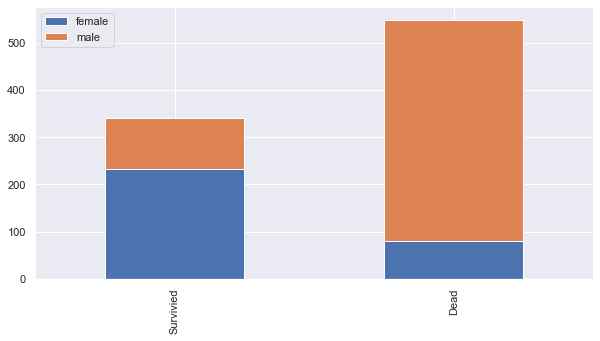

In [10]:
bar_chart('Sex')

- ```성별```에 따른 생존,사망 여부 시각화

,1,2,3
Survivied,136,87,119
Dead,80,97,372


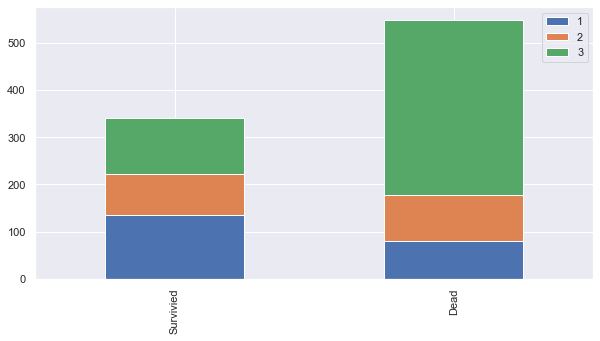

In [11]:
bar_chart('Pclass')

- ```객실 등급```에 따른 생존,사망 여부

,0,1,2,3,4,5,8
Survivied,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


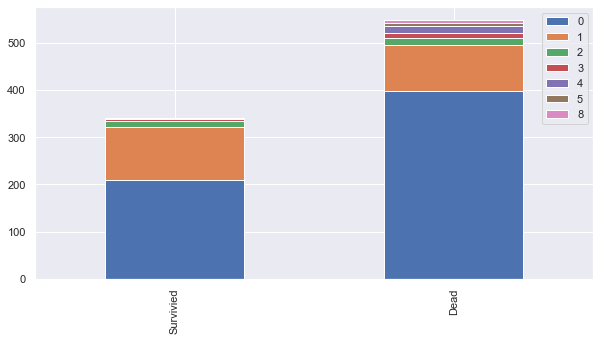

In [12]:
bar_chart('SibSp')

- ```탑승 가족 수```에 따른 생존,사망 시각화

,0,1,2,3,4,5,6
Survivied,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


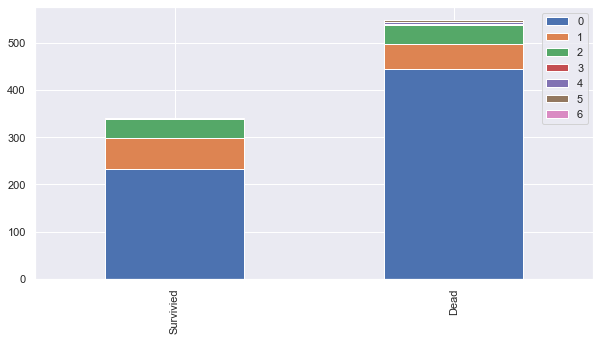

In [13]:
bar_chart('Parch')

,S,C,Q
Survivied,217,93,30
Dead,427,75,47


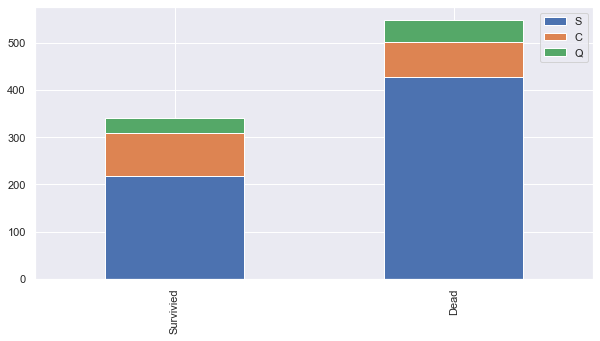

In [14]:
bar_chart('Embarked')

- ```출발 선착장```에 따른 생존,사망 시각화

<br><br>

## 2. Feature Engineering

<br>


- machine learning classifier을 위한 전처리(문자 -> 숫자)


In [15]:
train_test_data = [train,test] # train,test 두 개의 dataFrame에 모두 적용하기 위해

for dataset in train_test_data: # 첫번째로 train , 두번째로 test
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    
print(train['Title'].value_counts())
print('*'*50)
print(test['Title'].value_counts())


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Mme           1
Countess      1
Sir           1
Ms            1
Capt          1
Don           1
Jonkheer      1
Name: Title, dtype: int64
**************************************************
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [16]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3,
                 "Countess":3, "Ms":3, "Lady":3,
                "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


,0,1,2,3
Survivied,81,127,99,35
Dead,436,55,26,32


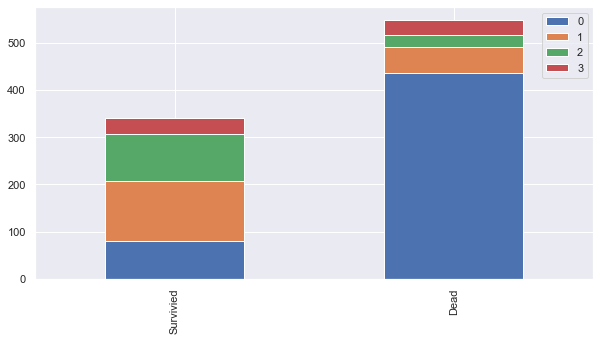

In [19]:
bar_chart('Title')

In [20]:
# delete unnecessary feature from dataSet

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [21]:
sex_mapping = {"male" :0, "female":1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

,0,1
Survivied,109,233
Dead,468,81


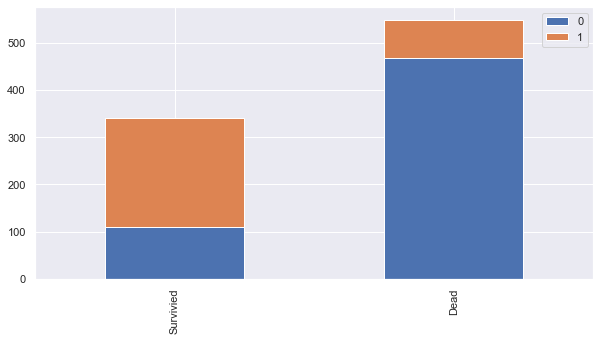

In [22]:
bar_chart('Sex')

#### Age Feature 전처리 <br>

- ```결측치``` 처리하기 <br>
- 앞서 구한 Title 정보를 토대로 남자의 경우 남자의 평균치로, 여자의 경우 여자의 평균치로 결측치 대체

In [23]:
# Age 결측치를 대체
# 각 Title별 Age의 평균값으로 대체

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

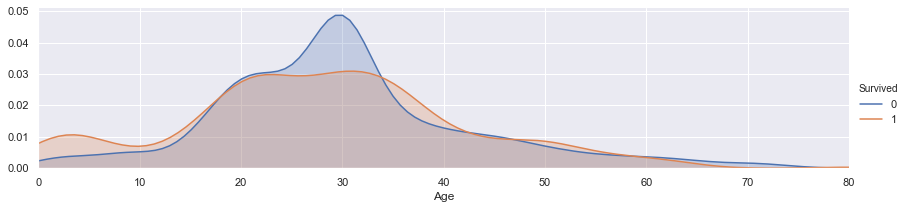

In [24]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

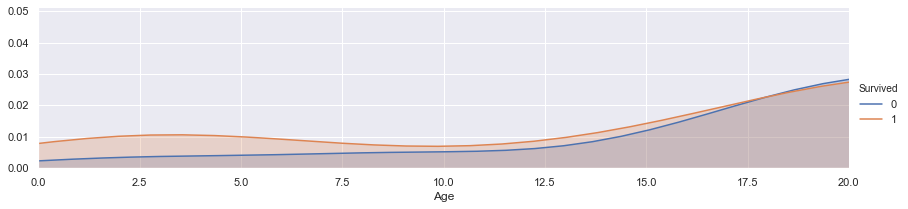

In [25]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 30)

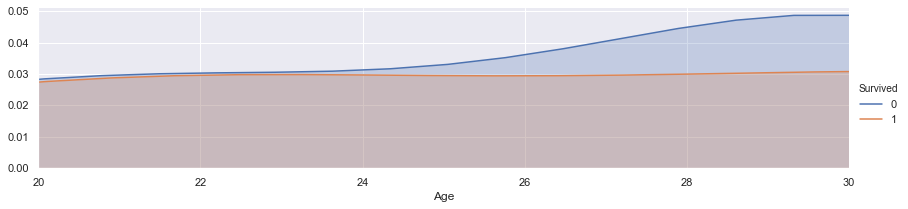

In [26]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,30)

(30, 40)

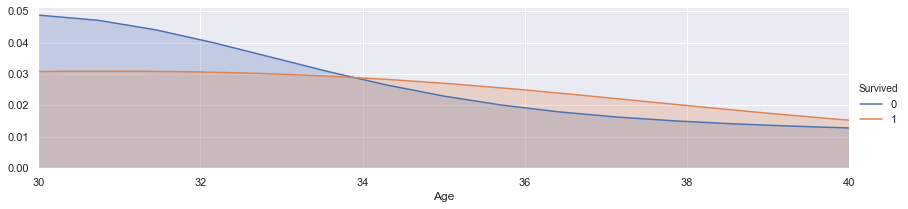

In [27]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(30,40)

(40, 50)

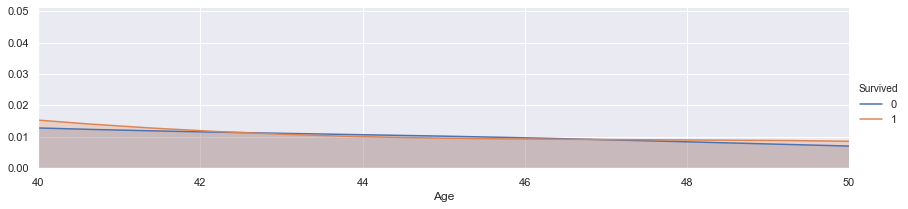

In [28]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(40,50)

#### 연속형 자료를 카테고리형으로 binning

<br>

- Age -> Categorical Data로

- feature vector map :
    - child = 0
    - young = 1
    - adult = 2
    - mid-age = 3
    - senior = 4 

In [29]:
def to_categorical_age(x):
    if x > 62 :
        result = 4
    elif (x<=62) & (x>36) :
        result = 3
    elif (x<=36) & (x>26) :
        result = 2
    elif (x<=26) & (x>16) :
        result = 1
    elif x<=16 :
        result = 0
    return result

for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].apply(to_categorical_age)

,2,1,3,0,4
Survivied,116,97,69,57,3
Dead,220,158,111,48,12


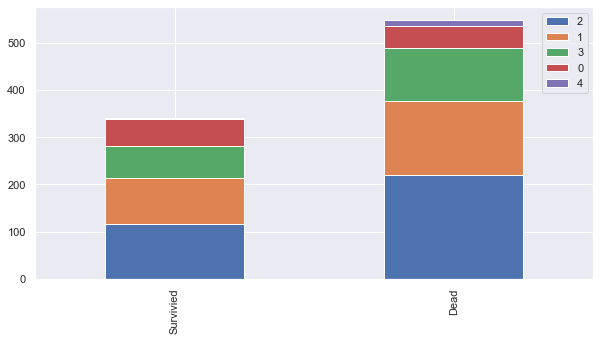

In [30]:
bar_chart('Age')

#### Embarked 변수 Feature Engineering

<br>

- 출발 선착지의 경우 해당 선착지(도시)의 부,소득수준을 고려해 볼 수 있다
- 결측치 대체

In [31]:
train['Embarked'].isnull().sum()

2

In [32]:
test['Embarked'].isnull().sum()

0

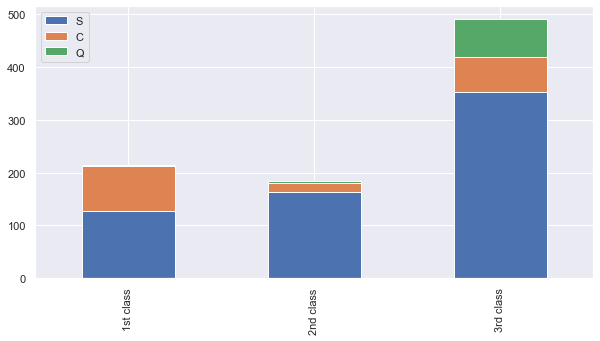

In [33]:
pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [34]:
#  Embarked 결측치의 경우 모든 class에서 'S'가 가장 많이 나왓으므로 'S'로 대체하여도 무방

for dataset in train_test_data:
    dataset['Embarked'].fillna('S',inplace=True)

In [35]:
embarked_mapping = {"S":0, "C":1, "Q":2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### fare 변수 Feature Engineering

<br>

- 결측치 대체 Pclass에 따른 평균값으로 대체

In [36]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

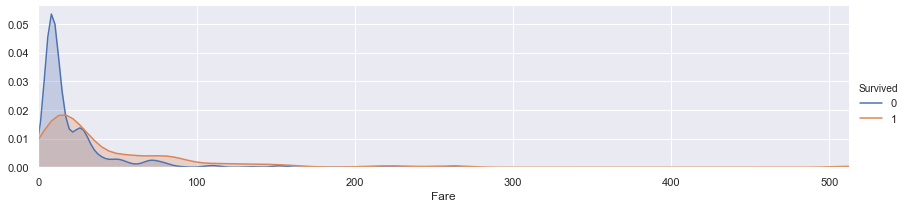

In [37]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

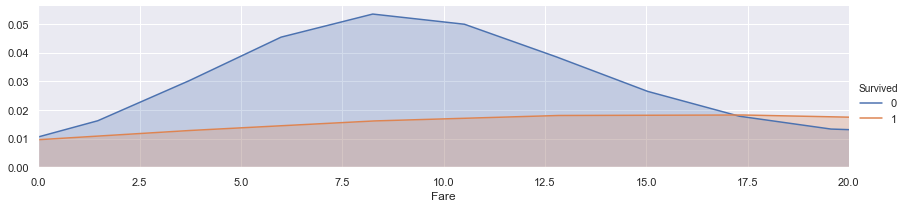

In [38]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 30)

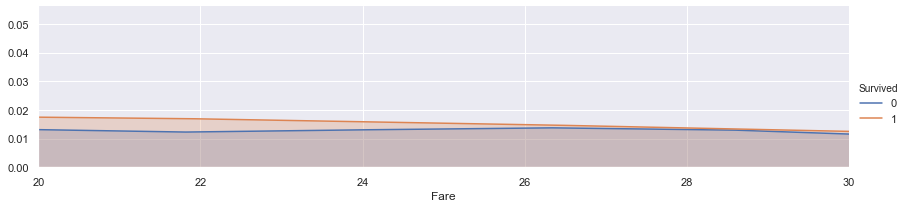

In [39]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(20,30)

In [40]:
# Fare 변수 binning

def to_categorical_fare(x):
    if x > 100 :
        result = 3
    elif (x<=100) & (x>30) :
        result = 2
    elif (x<=30) & (x>17) :
        result = 1
    elif x<=17 :
        result = 0
    return result

for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].apply(to_categorical_fare)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,C123,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0


#### cabin(객실번호) 변수 Feature Engineering

<br>

- 

In [42]:
train['Cabin'].value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
Name: Cabin, dtype: int64

In [43]:
# 객실번호 맨앞글자로 분류해보기

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

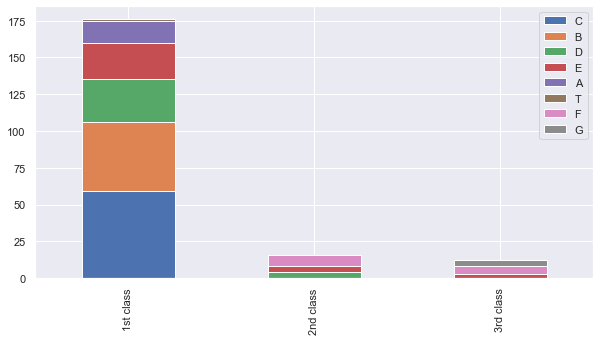

In [44]:
pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

#### Feature Scaling

In [45]:
# 데이터 간 편향성을 줄이기 위해 데이터의 범위를 조정

cabin_mapping = {"A":0, "B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [46]:
# Cabin 결측치 대체

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

#### Familyze Size 변수 Feature Engineering

<br>

- SibSp 와 Parch 변수를 합하여 가족 수 (함께 탑승한) 변수 추가
- 결측치 대체

In [47]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

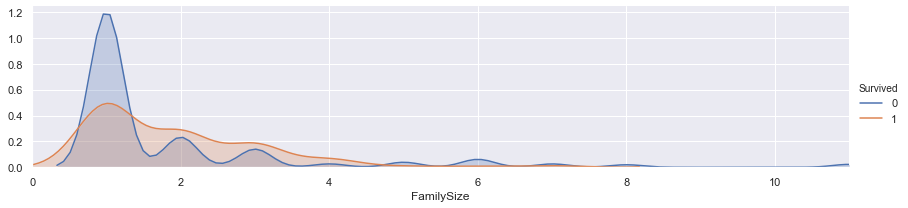

In [48]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자 탑승한(가족수 0) 경우 사망율이 더 높다고 볼 수 있음

In [49]:
# Data Scaling
# 데이터 간 편향성을 줄이기 위해 데이터의 범위를 조정

familysize_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(familysize_mapping)

#### 필요없는 Feature 제거하기

<br>



In [50]:
features_drop = ['Ticket','SibSp','Parch']

train = train.drop(features_drop, axis=1)
train = train.drop(['PassengerId'],axis=1)
test = test.drop(features_drop, axis=1)

In [51]:
train_data = train.drop('Survived', axis=1)
target = train['Survived'] # 생존여부 data

train_data.shape, target.shape

((891, 8), (891,))

## 3. Feature Engineering DataSet

<br> 

- Feature Vector 생성

In [52]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0,2.0,0,0,0.4
1,1,1,3,2,0.8,1,2,0.4
2,3,1,1,0,2.0,0,1,0.0
3,1,1,2,2,0.8,0,2,0.4
4,3,0,2,0,2.0,0,0,0.0


## 3. Modeling

- 적합한 classifier 선택
- cross validation
- final accuracy

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

## cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # 10개의 split 사용

#### KNN

<br>

- 근접 구역을 정해 해당 구역에 생존자,사망자 수를 비교하여 생존,사망 여부 예측
- kfold (10) 이용 train 데이터를 10개로 나누어 1개를 validation 하는 동안 나머지 9개의 데이터를 train 으로 사용하는식으로 10번 반복
- 모든 데이터셋을 validation 하게 되므로 bias를 줄일 수 있음

<br>

![kfold](https://i.ytimg.com/vi/MFB1T0NObFg/maxresdefault.jpg)

In [54]:
clf = KNeighborsClassifier(n_neighbors = 13) # 13개의 neighbors

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [55]:
# kNN Score
round(np.mean(score)*100, 2)


82.6

#### DecisionTree

In [56]:
clf = DecisionTreeClassifier()

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.76666667 0.83146067 0.7752809  0.7752809  0.87640449 0.75280899
 0.82022472 0.82022472 0.74157303 0.78651685]


In [57]:
# decision tree Score
round(np.mean(score)*100, 2)

79.46

#### RandomForest

In [58]:
clf = RandomForestClassifier(n_estimators=13)

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.83146067 0.79775281 0.76404494 0.86516854 0.80898876
 0.82022472 0.82022472 0.74157303 0.80898876]


In [59]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.58

#### Naive Bayes

In [60]:
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [61]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

#### SVM

In [62]:
clf = SVC()

scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193:

In [63]:
round(np.mean(score)*100,2)

83.5

## 4. Testing

In [64]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [66]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
